# Rendimiento de estudiantes de secundaria

# Abstract

## Resumen

Este conjunto de datos contiene información de más de 2000 estudiantes de secundaria; abarcando aspectos demográficos, hábitos de estudio, participación parental, actividades extracurriculares y rendimiento académico. 


## Contenido

#### <u>Información del Estudiante</u>

***StudentID:*** Identificador único asignado a cada estudiante (rango de 1001 a 3392).


#### <u>Detalles Demográficos</u>

***Age:*** Edad de los estudiantes, que varía entre 15 y 18 años.

***Gender:*** Género de los estudiantes, donde 0 representa "Masculino" y 1 "Femenino".

***Ethnicity:*** Etnicidad de los estudiantes, codificada de la siguiente manera:

0: Caucásico
1: Afroamericano
2: Asiático
3: Otros


#### <u>ParentalEducation</u> 

***Nivel de educación de los padres***, codificado de la siguiente forma:

0: Ninguno
1: Secundaria
2: Algo de universidad
3: Licenciatura
4: Superior


#### <u>Hábitos de Estudio</u>
***StudyTimeWeekly:*** Tiempo de estudio semanal en horas, que varía de 0 a 20 horas.

***Absences:*** Número de ausencias durante el año escolar, con un rango de 0 a 30.

***Tutoring:*** Estado de tutoría, donde 0 indica "No" y 1 "Sí".


#### <u>Participación Parental</u>
***ParentalSupport:*** Nivel de apoyo parental, codificado de la siguiente manera:

0: Ninguno
1: Bajo
2: Moderado
3: Alto
4: Muy Alto


#### <u>Actividades Extracurriculares</u>
***Extracurricular:*** Participación en actividades extracurriculares, donde 0 indica "No" y 1 "Sí".

***Sports:*** Participación en deportes, donde 0 indica "No" y 1 "Sí".

***Music:*** Participación en actividades musicales, donde 0 indica "No" y 1 "Sí".

***Volunteering:*** Participación en actividades de voluntariado, donde 0 indica "No" y 1 "Sí".


#### <u>Rendimiento Académico</u>
***GPA:*** Promedio de calificaciones en una escala de 2.0 a 4.0, influenciado por los hábitos de estudio, la participación parental y las actividades extracurriculares.

La variable objetivo, ***GradeClass***, clasifica las calificaciones de los estudiantes en diferentes categorías segun su GPA:

0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)

## Hipótesis

***Hipótesis 1 - Influencia del apoyo parental en el éxito académico:*** 
Los estudiantes que reciben un mayor apoyo de sus padres, tienden a obtener un GPA significativamente más alto. O sea, el apoyo parental tiene una influencia positiva en el éxito académico de los estudiantes de secundaria.

***Hipótesis 2 - Impacto de la participación en actividades extracurriculares en el rendimiento académico:***
Los estudiantes que participan en actividades extracurriculares (como ser deportes o música) tienen un mejor rendimiento académico (GPA) en comparación con aquellos que no participan de tales actividades.

***Hipótesis 3 - Incidencia del nivel educativo de los padres en la cantidad de faltas de los estudiantes:***
Los estudiantes cuyos padres tienen un mayor nivel educativo tienden a tener menos ausencias.

## Objetivo principal

Crear un modelo predictivo que permita clasificar a los estudiantes en diferentes categorías de desempeño académico (GradeClass: A, B, C, D, F) utilizando las variables del dataset, como características demográficas, hábitos de estudio, apoyo parental, participación extracurricular y ausencias. 

## Impacto

* Mejora de Políticas Educativas
* Desarrollo de Programas de Intervención
* Optimización de Recursos Educativos

# Análisis del Dataset

In [29]:
import pandas as pd
df= pd.read_csv('Student_performance_data.csv',sep=',')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [30]:
#Detalle de la cantidad de filas y columnas
df.shape

(2392, 15)

In [31]:
#Verificación de valores nulos por columna
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [32]:
#Remover la columna de Student ID
df1 = df.drop(columns=['StudentID'])

In [33]:
#Resumen estadístico
df1.describe().round(2)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.0,2392.00,2392.00,2392.00
mean,16.47,0.51,0.88,1.75,9.77,14.54,0.30,2.12,0.38,0.30,0.2,0.16,1.91,2.98
std,1.12,0.50,1.03,1.00,5.65,8.47,0.46,1.12,0.49,0.46,0.4,0.36,0.92,1.23
min,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,15.00,0.00,0.00,1.00,5.04,7.00,0.00,1.00,0.00,0.00,0.0,0.00,1.17,2.00
50%,16.00,1.00,0.00,2.00,9.71,15.00,0.00,2.00,0.00,0.00,0.0,0.00,1.89,4.00
75%,17.00,1.00,2.00,2.00,14.41,22.00,1.00,3.00,1.00,1.00,0.0,0.00,2.62,4.00
max,18.00,1.00,3.00,4.00,19.98,29.00,1.00,4.00,1.00,1.00,1.0,1.00,4.00,4.00


## Conclusiones preliminares

* La edad promedio de los estudiantes es de aproximadamente 16.47 años, con un rango de entre 15 y 18 años.
* La distribución de género está casi equilibrada, con un promedio cercano a 0.51 (donde 0 y 1 representan los dos géneros codificados en el dataset).
* La mayoría de los estudiantes son caucásicos (caucásico = 0), ya que tanto la mediana como el primer cuartil están en 0.
* El nivel educativo promedio de los padres está alrededor de 1.75, en una escala de 0 a 4. La mediana es 2, lo que sugiere que muchos padres tienen un nivel educativo intermedio.
* El apoyo parental promedio es 2.12, en una escala de 0 a 4, lo que indica un nivel moderado de apoyo parental entre los estudiantes.
* Los estudiantes dedican un promedio de aproximadamente 9.77 horas a la semana al estudio, con un rango que varía desde casi 0 horas hasta casi 20 horas.
* El número de ausencias promedio es de 14.54 días, con un rango entre 0 y 29 días. Esto sugiere que algunos estudiantes tienen una asistencia muy irregular.
* Aproximadamente el 38% de los estudiantes participan en alguna actividad extracurricular: 30% de los estudiantes participan en deportes, 20% de los estudiantes participan en actividades relacionadas con la música y 15.7% de los estudiantes participan en actividades de voluntariado.
* El promedio de calificaciones (GPA) es de 1.91 en una escala de 0 a 4. La desviación estándar del GPA es relativamente alta (0.92), lo que indica una considerable variabilidad en el rendimiento académico entre los estudiantes. 
* Tambien se observa en la columna de GradeClass que la mediana es 4 (F).


# Gráficos

Se realizan distintos tipos de gráficos que permiten una mejor comprensión y análisis del dataset y de esta forma poder identificar patrones, tendencias y relaciones entre variables

- ***Gráfico de líneas:*** Relación entre el Apoyo Parental y el GPA (Matplotlib)
- ***Boxplot:*** Distribución del GPA según el Nivel de Apoyo Parental (Seaborn)
- ***Gráfico de barras:*** Número de Estudiantes por Actividad Extracurricular (Seaborn)
- ***Gráfico de líneas mejorado:*** Media del GPA por Actividad Extracurricular (Matplotlib)
- ***Histograma:*** Distribución de las Faltas por Nivel Educativo de los Padres (Matplotlib)
- ***Gráfico de puntos:*** Relación entre Faltas, GPA y Nivel Educativo de los Padres (Seaborn)
- ***Mapa de Calor de Correlacion de Peason*** (Seaborn) - se utiliza como técnica para selección de variables - 


In [36]:
# Importar librería Matplotlib y Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Gráfico de líneas: Relación entre el Apoyo Parental y el GPA

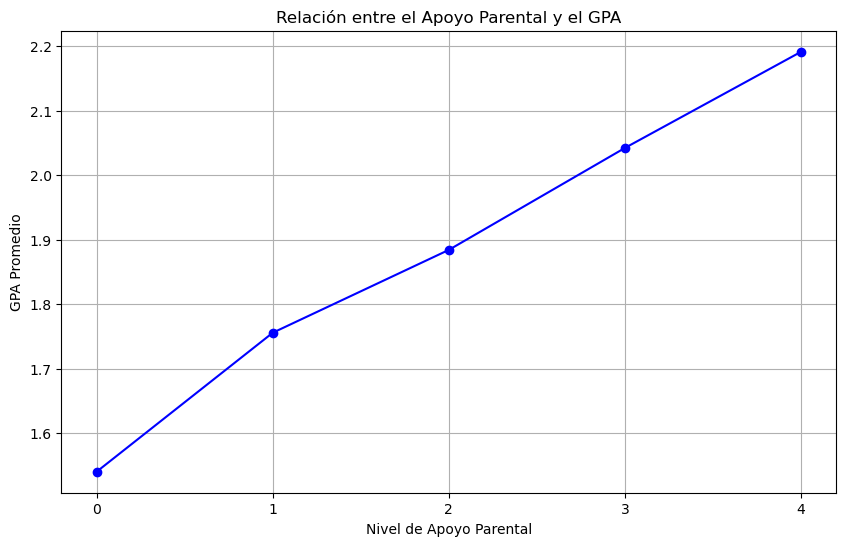

In [37]:
# Calcular el GPA promedio para cada nivel de apoyo parental
avg_gpa_by_support = df.groupby('ParentalSupport')['GPA'].mean().reset_index()

# Graficar la relación entre el apoyo parental y el GPA
plt.figure(figsize=(10, 6))
plt.plot(avg_gpa_by_support['ParentalSupport'], avg_gpa_by_support['GPA'], marker='o', linestyle='-', color='blue')

plt.xlabel('Nivel de Apoyo Parental')
plt.ylabel('GPA Promedio')
plt.title('Relación entre el Apoyo Parental y el GPA')
plt.xticks(avg_gpa_by_support['ParentalSupport'])  
plt.grid(True)
plt.show()

Este gráfico nos permite visualizar de forma clara que la relación entre el apoyo parental y el GPA tiene una pendiente positiva, por ende, a mayor apoyo parental, el GPA tiende a ser más alto, de cualquier forma al ir de 0 a 4 en el apoyo parental, solo se aumenta un 0.6 de GPA (de 1.6 a 2.2) lo que no parece ser un número muy significativo. Gráficos posteriores nos ayudarán a visualizar mejor su impacto.

## Boxplot: Distribución del GPA según el Nivel de Apoyo Parental

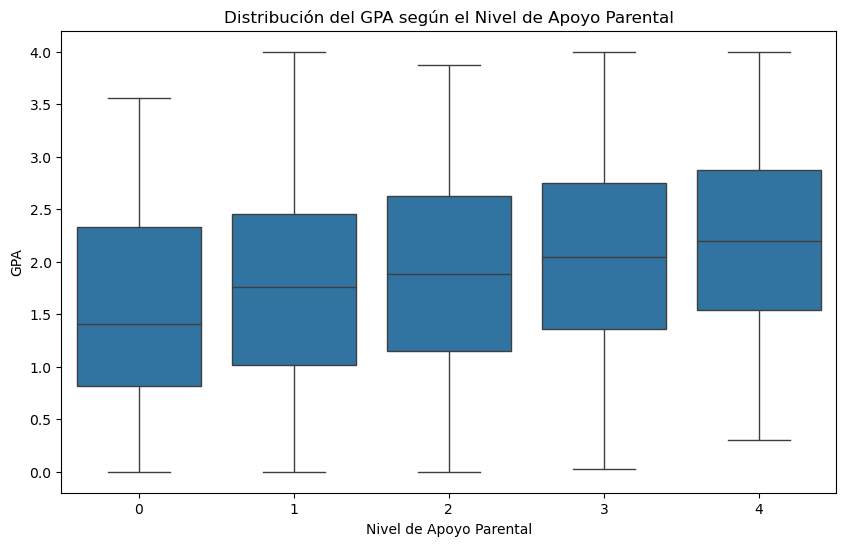

In [38]:
# Graficar la Distribución del GPA según el Nivel de Apoyo Parental
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalSupport', y='GPA', data=df)

plt.xlabel('Nivel de Apoyo Parental')
plt.ylabel('GPA')
plt.title('Distribución del GPA según el Nivel de Apoyo Parental')
plt.show()

Este gráfico profundiza lo ya mostrado en el gráfico anterior. Se puede apreciar que la mediana del GPA tiende a aumentar con niveles más altos de apoyo parental, lo que continúa sugiriendo que un mayor apoyo parental está asociado con un mejor rendimiento académico.

## Gráfico de Barras: Número de Estudiantes por Actividad Extracurricular

In [39]:
# Lista de actividades extracurriculares
activities = ['Sports', 'Music', 'Volunteering']

# Calcular cuántos estudiantes participan en cada actividad
counts = df[activities].sum()

# Calcular cuántos estudiantes no participan en ninguna actividad
no_activity_count = (df[activities].sum(axis=1) == 0).sum()

# Agregar la categoría "No Participation" al conteo
counts['No Participation'] = no_activity_count

counts.head()

Sports               726
Music                471
Volunteering         376
No Participation    1120
dtype: int64

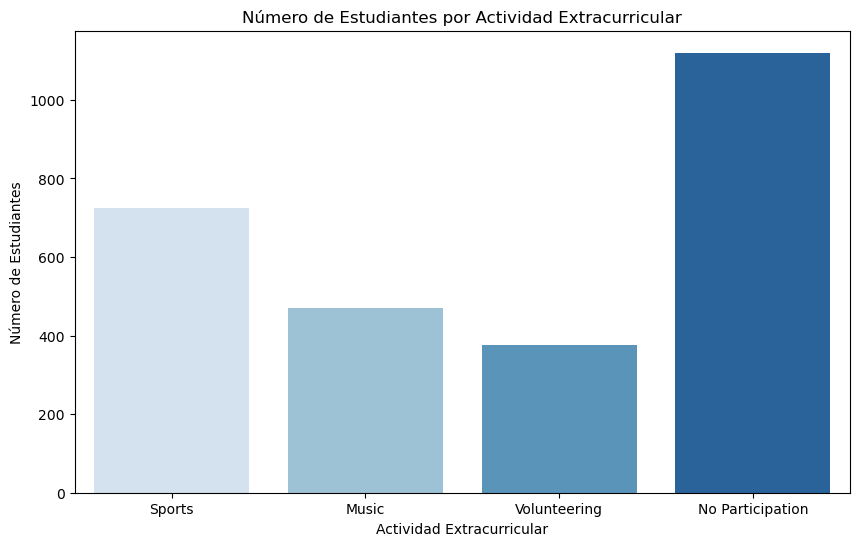

In [40]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='Blues', legend=False)
plt.xlabel('Actividad Extracurricular')
plt.ylabel('Número de Estudiantes')
plt.title('Número de Estudiantes por Actividad Extracurricular')
plt.show()

Este gráfico ofrece una vista clara de las preferencias de los estudiantes, lo que puede ser valioso para los responsables de la toma de decisiones en un entorno educativo. Se observa que una gran parte de los estudiantes no está involucrada en actividades extracurriculares, se podria analizar cuál es el motivo (falta de interés, acceso limitado, etc)

## Gráfico de líneas mejorado: Media del GPA por Actividad Extracurricular

In [41]:
# Crear una nueva columna que indique la actividad en la que participa cada estudiante
df['Activity_Participation'] = 'No Participation'
df.loc[df['Sports'] == 1, 'Activity_Participation'] = 'Sports'
df.loc[df['Music'] == 1, 'Activity_Participation'] = 'Music'
df.loc[df['Volunteering'] == 1, 'Activity_Participation'] = 'Volunteering'

# Calcular la media del GPA por actividad
gpa_means = df.groupby('Activity_Participation')['GPA'].mean()
print(gpa_means)

Activity_Participation
Music               2.023164
No Participation    1.838015
Sports              1.961667
Volunteering        1.913089
Name: GPA, dtype: float64


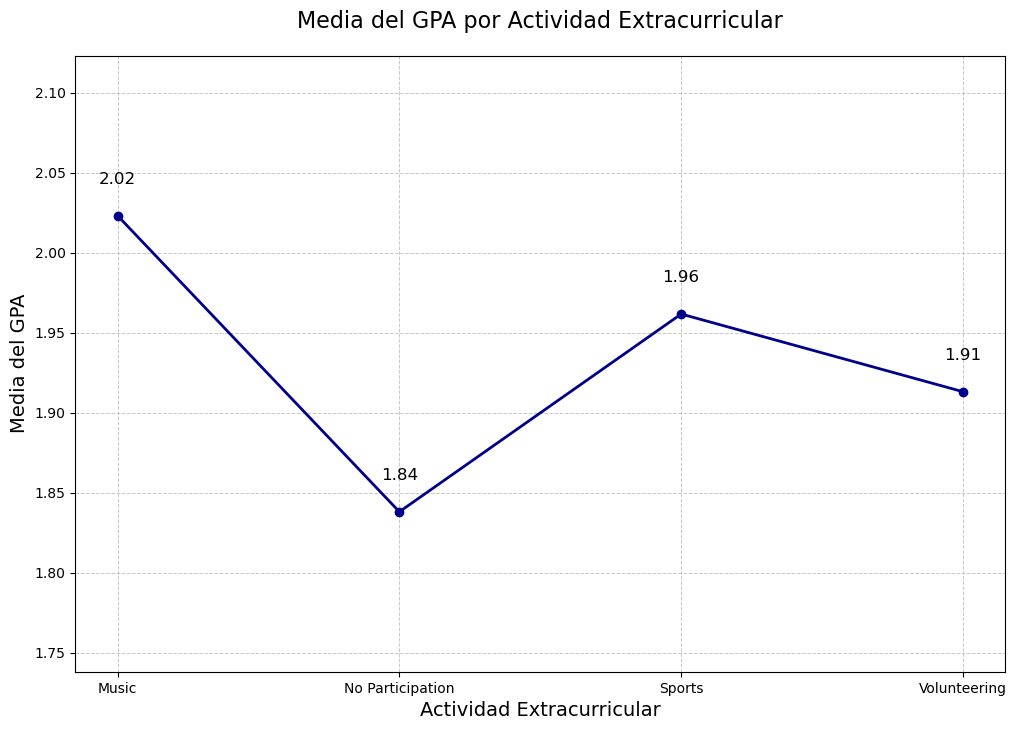

In [42]:
# Graficar las medias de GPA en un gráfico de líneas mejorado
plt.figure(figsize=(12, 8))
plt.plot(gpa_means.index, gpa_means.values, marker='o', linestyle='-', color='darkblue', linewidth=2)
for i, value in enumerate(gpa_means.values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=12, color='black')
plt.xlabel('Actividad Extracurricular', fontsize=14)
plt.ylabel('Media del GPA', fontsize=14)
plt.title('Media del GPA por Actividad Extracurricular', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.ylim(gpa_means.min() - 0.1, gpa_means.max() + 0.1)
plt.show()

Se muestra cómo el GPA promedio varía según la participación en diferentes actividades extracurriculares. En este caso el rango va de 1.84 a 2.02 por ende la amplitud no es muy grande. Si bien aquellos que no participan de actividades son quienes tienen un promedio de GPA más bajo y aquellos que participan de actividades relacionadas con la múásica el más alto. La mejora no parece ser significativa. 

## Histograma: Distribución de las Faltas por Nivel Educativo de los Padres

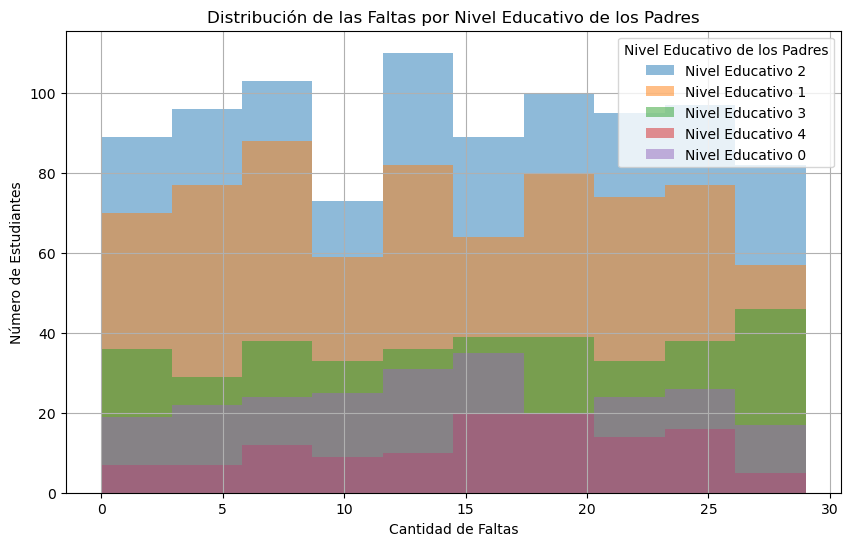

In [43]:
plt.figure(figsize=(10, 6))

# Histograma separado por nivel educativo de los padres
levels_of_education = df['ParentalEducation'].unique()
for level in levels_of_education:
    subset = df[df['ParentalEducation'] == level]
    plt.hist(subset['Absences'], bins=10, alpha=0.5, label=f'Nivel Educativo {level}')

plt.xlabel('Cantidad de Faltas')
plt.ylabel('Número de Estudiantes')
plt.title('Distribución de las Faltas por Nivel Educativo de los Padres')
plt.legend(title='Nivel Educativo de los Padres')
plt.grid(True)

plt.show()

Los estudiantes con padres de un nivel educativo superior (4), muestran un rango máximo de faltas entre 15 y 20, sin embargo los estudiantes con padres de un nivel educativo medio (2), tienen un rango máximo de faltas entre 10 y 15.

## Gráfico de puntos: Relación entre Faltas, GPA y Nivel Educativo de los Padres

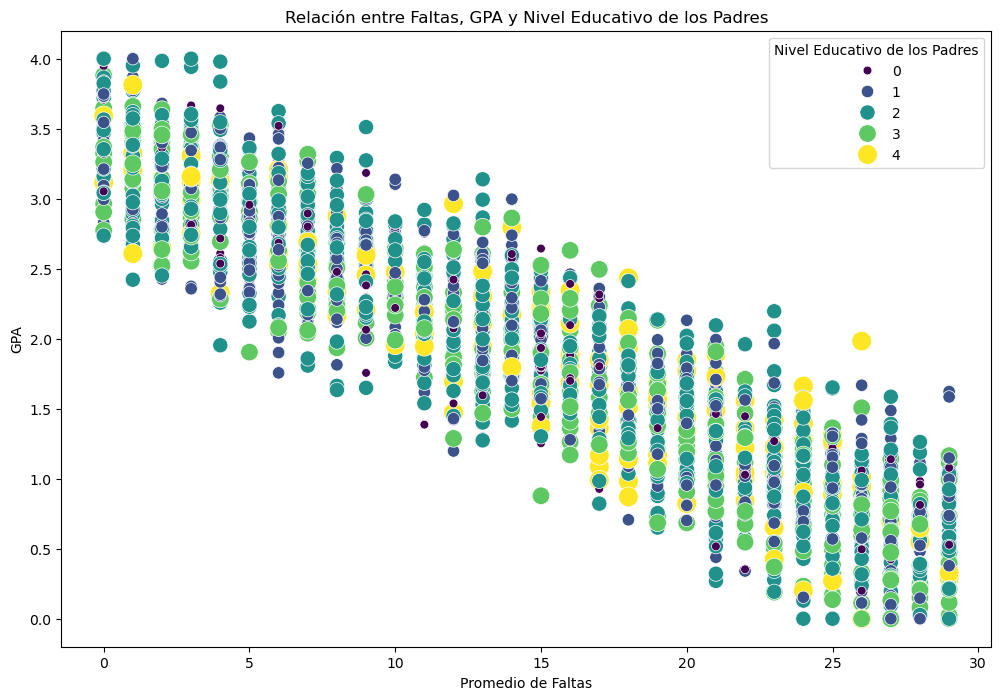

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Absences', y='GPA', hue='ParentalEducation', palette='viridis', size='ParentalEducation', data=df, sizes=(40, 200))

plt.xlabel('Promedio de Faltas')
plt.ylabel('GPA')
plt.title('Relación entre Faltas, GPA y Nivel Educativo de los Padres')
plt.legend(title='Nivel Educativo de los Padres')
plt.show()

En general, se puede concluir que existe una relación entre el número de faltas y el GPA. Los estudiantes que faltan más a clase tengan un GPA más bajo, lo que sugiere que la asistencia regular es clave para un buen rendimiento académico.
Como vimos en el gráfico anterior, el nivel educativo de los padres no parece influenciar, tanto como se pensaría en un principio, en la cantidad de faltas

# Análisis preliminar de outliers

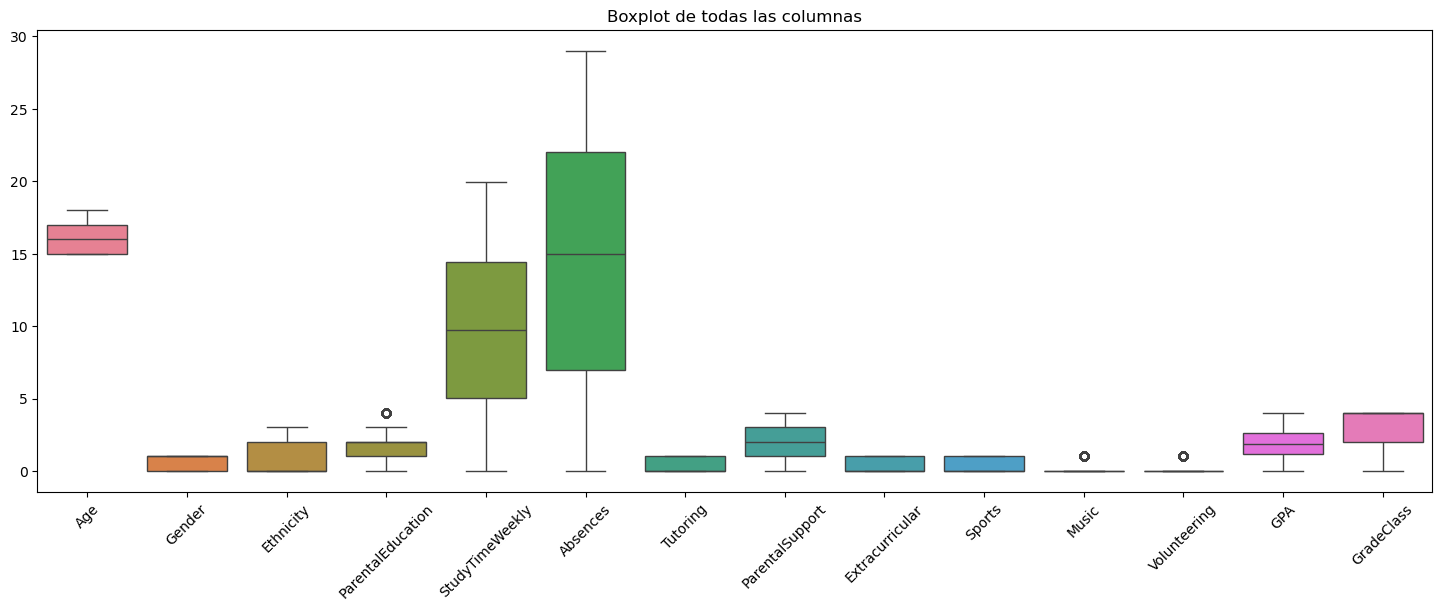

In [45]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df1)
plt.title("Boxplot de todas las columnas")
plt.xticks(rotation=45)
plt.show()

## Identificar outliers de Parental Education

In [46]:
# Calcular Q1, Q3 e IQR
Q1 = df1['ParentalEducation'].quantile(0.25)
Q3 = df1['ParentalEducation'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3)


1.0 2.0


In [47]:
pd.set_option('display.max_rows', None)
# Calcular los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar outliers
outliers = df1[(df1['ParentalEducation'] < limite_inferior) | (df1['ParentalEducation'] > limite_superior)]

# Mostrar outliers
print(f'Los outliers detectados están en las filas: ', outliers['ParentalEducation'].index)

Los outliers detectados están en las filas:  Index([   7,   23,   56,   57,   66,  122,  136,  148,  182,  184,
       ...
       2055, 2078, 2085, 2127, 2175, 2178, 2238, 2243, 2318, 2368],
      dtype='int64', length=120)


# Insights relevantes

***Hipótesis 1: Influencia del Apoyo Parental en el Éxito Académico:***
El análisis sugiere que el apoyo parental tiene una influencia positiva en el rendimiento académico de los estudiantes, pero su impacto es limitado. Aunque los estudiantes que reciben un mayor nivel de apoyo parental tienden a tener mejores GPA, no es un factor decisivo por sí solo. Un aumento en el nivel de apoyo parental puede estar asociado con una ligera mejora en el rendimiento académico, pero otros factores, como los hábitos de estudio y las características individuales de los estudiantes, parecen tener un peso más significativo. Por lo tanto, el apoyo parental es importante, pero no garantiza un éxito académico elevado.

***Hipótesis 2: Impacto de la Participación en Actividades Extracurriculares en el Rendimiento Académico***
La participación en actividades extracurriculares muestra una relación muy débil con el GPA. Aunque los estudiantes que participan en música tienen una media de GPA ligeramente superior (2.02) en comparación con los que no participan en ninguna actividad (1.84), la diferencia no es lo suficientemente significativa como para sugerir que la participación en actividades extracurriculares mejora sustancialmente el rendimiento académico. La hipótesis de que la participación en actividades extracurriculares impacta significativamente en el rendimiento académico no es fuertemente respaldada por estos datos. Hay que considerar que hay un número significativo de estudiantes que no participan en ninguna actividad, esto podría sugerir que hay barreras que impiden su participación, como falta de interés, acceso limitado, o carga académica. Este dato podría ser útil para las instituciones educativas al diseñar programas que fomenten una mayor participación.

***Hipótesis 3: Incidencia del Nivel Educativo de los Padres en la Cantidad de Faltas***
La media de ausencias es alta, pero no parece estar fuertemente influenciado por el nivel educativo de los padres. Como pasa con las otras hipótesis, tiene cierta influencia pero no es determinante


# Preparación para los modelos

## Selección de Características (Feature Selection)

Utilizando el método filtro, se utiliza la correlación de Pearson para medir la relación entre las características numéricas y Chi-Cuadrado para las categóricas

### Mapa de Calor de Correlación de Pearson

Para aplicar la correlación de Pearson, solo se deben incluir variables cuantitativas continuas, ya que Pearson mide la relación lineal entre dos variables numéricas. Este dataset contiene en su mayoria variables categóricas por ende, las únicas variables que pueden ser incluidas son:

* Age
* StudyTimeWeekly
* Absences
* GPA

In [78]:
# Seleccionar las columnas cuantitativas para la correlación de Pearson
quantitative_vars = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Filtrar solo esas columnas del dataset
quantitative_df = df[quantitative_vars]

# Calcular la matriz de correlación de Pearson
pearson_corr = quantitative_df.corr(method='pearson')

# Mostrar la matriz de correlación
print(pearson_corr)

                      Age  StudyTimeWeekly  Absences       GPA
Age              1.000000        -0.006800 -0.011511  0.000275
StudyTimeWeekly -0.006800         1.000000  0.009326  0.179275
Absences        -0.011511         0.009326  1.000000 -0.919314
GPA              0.000275         0.179275 -0.919314  1.000000


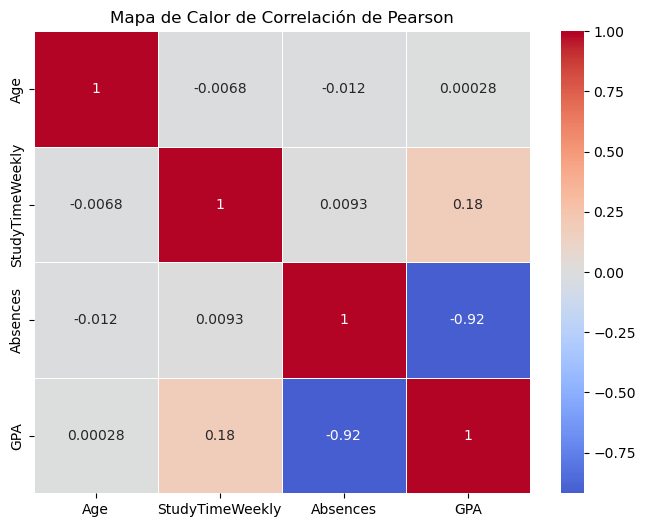

In [49]:
# Crear un heatmap para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Pearson')
plt.show()

Este mapa de calor parece indicar que no hay una correlacion significativa entre las variables del conjunto de datos, excepto por la variable faltas (absences)

### Chi-cuadrado

Para aplicar el test de Chi-cuadrado, las variables categóricas deben estar transformadas en números. Esto ya esta hecho en el dataset pero de cualquier forma se hace el ejercicio

In [50]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as np

In [51]:
# Lista de columnas categóricas
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 
                       'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Asegurarnos de que todas las columnas categóricas estén codificadas como valores numéricos (esto en si ya se sabe que es así dadas las características del dataset)
df_encoded = pd.get_dummies(df[categorical_columns])

# Definir X (variables independientes) e y (variable objetivo)
X = df_encoded  # Solo consideramos las variables categóricas para el test de Chi-cuadrado
y = df['GradeClass']  # Variable objetivo

# 2. Aplicar Chi-cuadrado
# Usamos SelectKBest con la prueba chi2 para seleccionar las mejores características
chi2_selector = SelectKBest(chi2, k='all')  # k='all' selecciona todas las características para evaluarlas
chi2_selector.fit(X, y)

# 3. Mostrar los resultados del Chi-cuadrado
# Los scores obtenidos de la prueba de chi-cuadrado para cada característica
chi2_scores = chi2_selector.scores_

# Crear un dataframe para ver los resultados de manera más clara
chi2_results = pd.DataFrame({"Característica": X.columns, "Chi2 Score": chi2_scores})
chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)

# Mostrar las características ordenadas por su Chi2 score
print(chi2_results)

# 4. Selección de las mejores características
k_best_features = chi2_selector.get_support(indices=True)  # Obtener índices de las características seleccionadas
X_k_best = X.iloc[:, k_best_features]

print(f"Las mejores características seleccionadas por Chi-cuadrado son:\n{X.columns[k_best_features]}")


      Característica  Chi2 Score
4    ParentalSupport   32.417345
3           Tutoring   26.372489
5    Extracurricular    8.766798
7              Music    6.337588
1          Ethnicity    5.091553
2  ParentalEducation    3.154149
6             Sports    3.043122
8       Volunteering    1.249801
0             Gender    0.936867
Las mejores características seleccionadas por Chi-cuadrado son:
Index(['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
       'ParentalSupport', 'Extracurricular', 'Sports', 'Music',
       'Volunteering'],
      dtype='object')


De esta forma se establecen cuáles serian las varables con mas importancia en la variable a predecir, de cualquier forma en el modelado se incorporarán todas ya que la dimensión del dataset no es tan grande.

## Depuración del dataset de outliers

Luego del análisis preliminar de outliers se determinó que los mismos se encontraron en las variables ParentalEducation, Music y Volunteering. Para variables categóricas como éstas, no tiene sentido eliminar los outliers porque no son valores extremos en el sentido numérico. Todos los valores dentro de las categorías son válidos. 

# Modelado

In [52]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Random Forest

Random Forest es un algoritmo de aprendizaje supervisado y fue elegido como opcion para este dataset porque puede manejar tanto características numéricas como categóricas; no es tan propenso al overfitting y es menos sensible a los outliers. Ademas, proporciona una medida clara de la importancia de cada característica, lo cual es útil para interpretar el modelo.

In [79]:
# 1. Separar las características (X) y la variable objetivo (y)
X = df.drop('GradeClass', axis=1)  
y = df['GradeClass']  

# Convertir las variables categóricas a numéricas
X = pd.get_dummies(X)

# 2. Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# 4. Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# 5. Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

In [65]:
# 6. Evaluar el modelo
# Métricas de evaluación: precisión, matriz de confusión, y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Mostrar el reporte de clasificación y la matriz de confusión
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred))

# 7. Importancia de características
# Obtener la importancia de las características del modelo Random Forest
feature_importances = rf_model.feature_importances_

# Crear un DataFrame con las características y su importancia
importances_df = pd.DataFrame({'Características': X.columns, 'Importancia': feature_importances})
importances_df = importances_df.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print('Características más importantes según el modelo Random Forest:')
print(importances_df.head(10))

Precisión del modelo: 92.34%
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        33
         1.0       0.87      0.91      0.89        80
         2.0       0.92      0.89      0.90       121
         3.0       0.88      0.90      0.89       127
         4.0       0.95      0.98      0.96       357

    accuracy                           0.92       718
   macro avg       0.91      0.85      0.87       718
weighted avg       0.92      0.92      0.92       718

Matriz de confusión:
[[ 19   3   3   3   5]
 [  1  73   1   2   3]
 [  0   4 108   6   3]
 [  0   2   4 114   7]
 [  0   2   2   4 349]]
Características más importantes según el modelo Random Forest:
      Características  Importancia
13                GPA     0.506687
6            Absences     0.212830
0           StudentID     0.090650
5     StudyTimeWeekly     0.052111
8     ParentalSupport     0.025083
4   ParentalEducation     0.018458
1          

## XGBoost

XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje supervisado. Se toma como opción basicamente porque esta considerado es uno de los modelos más precisos y eficientes, a su vez, puede manejar tanto variables numéricas como categóricas.

In [82]:
# 1. Separar las características (X) y la variable objetivo (y)
X = df.drop('GradeClass', axis=1)  
y = df['GradeClass']  

# Convertir las variables categóricas a numéricas
X = pd.get_dummies(X)

# 2. Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear el modelo XGBoost
# Configurar el clasificador XGBoost con hiperparámetros básicos
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# 4. Entrenar el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# 5. Hacer predicciones sobre el conjunto de prueba
y_pred = xgb_model.predict(X_test)


In [58]:
# 6. Evaluar el modelo
# Métricas de evaluación: precisión, matriz de confusión, y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Mostrar el reporte de clasificación y la matriz de confusión
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred))

# 7. Importancia de características
# Obtener la importancia de las características del modelo XGBoost
feature_importances = xgb_model.feature_importances_

# Crear un DataFrame con las características y su importancia
importances_df = pd.DataFrame({'Características': X.columns, 'Importancia': feature_importances})
importances_df = importances_df.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print('Características más importantes según el modelo XGBoost:')
print(importances_df.head(10))

Precisión del modelo: 91.09%
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.76      0.58      0.66        33
         1.0       0.78      0.86      0.82        80
         2.0       0.91      0.90      0.90       121
         3.0       0.92      0.89      0.90       127
         4.0       0.95      0.96      0.96       357

    accuracy                           0.91       718
   macro avg       0.86      0.84      0.85       718
weighted avg       0.91      0.91      0.91       718

Matriz de confusión:
[[ 19   3   3   3   5]
 [  3  69   4   2   2]
 [  1   4 109   3   4]
 [  0   5   2 113   7]
 [  2   7   2   2 344]]
Características más importantes según el modelo XGBoost:
                            Características  Importancia
13                                      GPA     0.602225
0                                 StudentID     0.098394
8                           ParentalSupport     0.028099
4                         Parental

## K-Nearest Neighbors (KNN)

El algoritmo K-Nearest Neighbors (KNN) es  tambien un método de aprendizaje supervisado, se toma este modelo como opcion, porque es fácil de entender e interpretar, no tiene una fase de entrenamiento tradicional y aunque es más adecuado para datos numéricos, KNN tambien puede manejar datos mixtos.

In [84]:
# 1. Separar las características (X) y la variable objetivo (y)
X = df.drop('GradeClass', axis=1)  
y = df['GradeClass'] 

# Convertir las variables categóricas a numéricas
X = pd.get_dummies(X)

# 2. Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Crear el modelo KNN
# Inicializamos el clasificador con 5 vecinos 
knn_model = KNeighborsClassifier(n_neighbors=5)

# 5. Entrenar el modelo
knn_model.fit(X_train, y_train)

# 6. Hacer predicciones sobre el conjunto de prueba
y_pred = knn_model.predict(X_test)


In [60]:
# 7. Evaluar el modelo
# Métricas de evaluación: precisión, matriz de confusión, y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Mostrar el reporte de clasificación y la matriz de confusión
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred))


Precisión del modelo: 63.37%
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.40      0.18      0.25        33
         1.0       0.36      0.34      0.35        80
         2.0       0.39      0.45      0.42       121
         3.0       0.47      0.39      0.42       127
         4.0       0.83      0.89      0.86       357

    accuracy                           0.63       718
   macro avg       0.49      0.45      0.46       718
weighted avg       0.62      0.63      0.62       718

Matriz de confusión:
[[  6  11   7   3   6]
 [  7  27  33   7   6]
 [  0  29  55  24  13]
 [  2   5  31  49  40]
 [  0   3  15  21 318]]


# Métricas

Basado en los resultados obtenidos en lo que refiere a ***precisión***:

***Random Forest*** es el mejor modelo para utilizar en este caso, ya que ofrece la mejor precisión global (92.34%) y mantiene un buen balance entre las clases. Además, proporciona una buena interpretación sobre las características más importantes.

***XGBoost*** es una alternativa viable, pero tiene una ligera desventaja en precisión en comparación con Random Forest.

***KNN*** no es adecuado para este dataset, ya que su precisión y capacidad de clasificación son significativamente más bajas que las de los otros modelos.

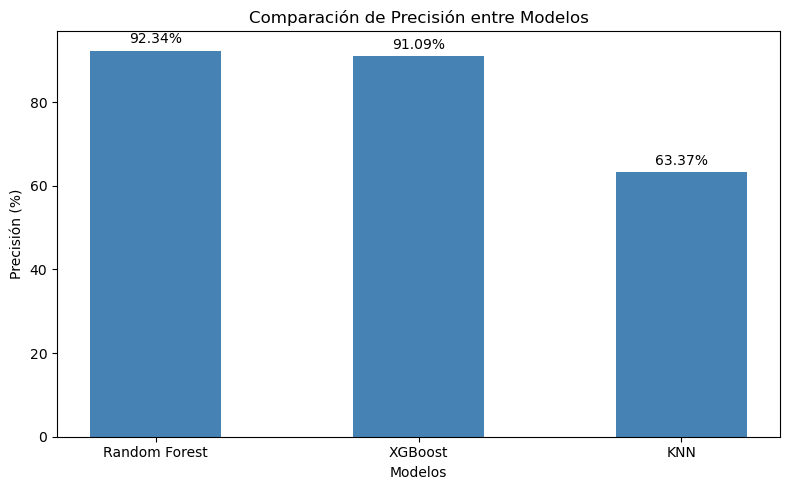

In [85]:
# Datos de precisión de cada modelo
modelos = ['Random Forest', 'XGBoost', 'KNN']
precision = [92.34, 91.09, 63.37]

# Crear un gráfico de barras para la comparación de precisión utilizando solo el color #4682b4
x = np.arange(len(modelos))

fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras con un solo color en azul (#4682b4)
bar = ax.bar(x, precision, color='#4682b4', width=0.5)

# Etiquetas y título del gráfico
ax.set_xlabel('Modelos')
ax.set_ylabel('Precisión (%)')
ax.set_title('Comparación de Precisión entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(modelos)

# Mostrar los valores sobre las barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar)

plt.tight_layout()
plt.show()

En lo que refiere a los resultados arrojados por el ***reporte de clasificación***:

***Random Forest*** es claramente el mejor modelo de los tres. Tiene el mejor rendimiento general en precisión, recall y f1-score.
Predice bien en todas las clases y tiene una buena capacidad para identificar correctamente la mayoría de las instancias (recall alto).
Su precisión y f1-score promedio de 0.92 indican que está bien equilibrado y captura correctamente las predicciones para la mayoría de las clases.

***XGBoost es una buena alternativa*** aunque tiene un rendimiento ligeramente inferior a Random Forest en términos de precisión y recall, sigue siendo un modelo muy sólido con un f1-score de 0.91. Si se buscan mejoras en el tiempo de entrenamiento o se necesita un modelo más optimizado en términos de regularización, XGBoost podría ser preferible.

***KNN*** no es adecuado para este problema ya que es significativamente más bajo en todas las métricas, con un f1-score promedio de 0.63.
Tiene problemas particularmente grandes en las clases con menos instancias, lo que indica que no maneja bien la complejidad del dataset.

In [77]:
# Resultados del reporte de clasificación para los tres modelos
# Random Forest
rf_report = {
    'precision': [0.95, 0.87, 0.92, 0.88, 0.95, 0.92],
    'recall': [0.58, 0.91, 0.89, 0.90, 0.98, 0.92],
    'f1-score': [0.72, 0.89, 0.90, 0.89, 0.96, 0.92],
    'support': [33, 80, 121, 127, 357, 718]
}

# XGBoost
xgb_report = {
    'precision': [0.76, 0.78, 0.91, 0.92, 0.95, 0.91],
    'recall': [0.58, 0.86, 0.90, 0.89, 0.96, 0.91],
    'f1-score': [0.66, 0.82, 0.90, 0.90, 0.96, 0.91],
    'support': [33, 80, 121, 127, 357, 718]
}

# KNN
knn_report = {
    'precision': [0.40, 0.36, 0.39, 0.47, 0.83, 0.63],
    'recall': [0.18, 0.34, 0.45, 0.39, 0.89, 0.63],
    'f1-score': [0.25, 0.35, 0.42, 0.42, 0.86, 0.62],
    'support': [33, 80, 121, 127, 357, 718]
}

# Crear DataFrames para cada reporte
rf_df = pd.DataFrame(rf_report, index=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Promedio'])
xgb_df = pd.DataFrame(xgb_report, index=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Promedio'])
knn_df = pd.DataFrame(knn_report, index=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Promedio'])

# Crear una tabla comparativa uniendo los resultados de los tres modelos
comparison_df = pd.concat([rf_df[['precision', 'recall', 'f1-score']], 
                           xgb_df[['precision', 'recall', 'f1-score']], 
                           knn_df[['precision', 'recall', 'f1-score']]],
                          axis=1, keys=['Random Forest', 'XGBoost', 'KNN'])

# Mostrar la tabla comparativa
comparison_df

# Crear una tabla comparativa uniendo los resultados de los tres modelos y transponer para que las clases sean columnas
comparison_df_transposed = pd.concat([rf_df[['precision', 'recall', 'f1-score']], 
                                      xgb_df[['precision', 'recall', 'f1-score']], 
                                      knn_df[['precision', 'recall', 'f1-score']]],
                                     axis=1, keys=['Random Forest', 'XGBoost', 'KNN']).T

# Mostrar la tabla transpuesta para que las clases queden como columnas
comparison_df_transposed


Clase 0  Clase 1  Clase 2  Clase 3  Clase 4  Promedio
Random Forest precision     0.95     0.87     0.92     0.88     0.95      0.92
              recall        0.58     0.91     0.89     0.90     0.98      0.92
              f1-score      0.72     0.89     0.90     0.89     0.96      0.92
XGBoost       precision     0.76     0.78     0.91     0.92     0.95      0.91
              recall        0.58     0.86     0.90     0.89     0.96      0.91
              f1-score      0.66     0.82     0.90     0.90     0.96      0.91
KNN           precision     0.40     0.36     0.39     0.47     0.83      0.63
              recall        0.18     0.34     0.45     0.39     0.89      0.63
              f1-score      0.25     0.35     0.42     0.42     0.86      0.62

# Conclusiones

El objetivo de crear un modelo predictivo para clasificar a los estudiantes en diferentes categorías de rendimiento académico se logró utilizando modelos como Random Forest y XGBoost, que alcanzaron una precisión del 92.34% y 91.09%, respectivamente. Estos modelos mostraron un buen balance en términos de precisión, recall y f1-score, especialmente en las clases mayoritarias, lo que indica su capacidad para predecir de manera efectiva el desempeño académico de los estudiantes.

Sin embargo, los resultados también revelan que las clases menos representadas, no fueron predichas con tanta precisión como las clases mayoritarias, lo que sugiere que hay margen para mejorar el rendimiento en estas clases específicas. El modelo KNN, en cambio, mostró un rendimiento significativamente más bajo, con una precisión del 63.37%, por lo que no se considera adecuado para este problema.

En general, la solución es sólida. No obstante, la mejora en el manejo de clases desbalanceadas y otras áreas específicas podría ayudar a perfeccionar aún más el modelo en el futuro.